<a href="https://colab.research.google.com/github/cleyslane/Clusterizacao/blob/master/Trabalho_Pr%C3%A1tico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports necessários 

import pandas as pd 
from sklearn import preprocessing
from scipy.spatial import distance_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics

## DataSet

In [ ]:
# Carregando a base de dados 
dataset_ocorrencias = pd.read_csv("ocorrencias.csv")
dataset_vitimas = pd.read_csv("vitimas.csv")

In [ ]:
dataset_ocorrencias.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2015,janeiro,6
1,Acre,Furto de veículo,2015,janeiro,0
2,Acre,Homicídio doloso,2015,janeiro,13
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0


In [ ]:
dataset_vitimas.head()

,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,2015,janeiro,13
1,Acre,Homicídio doloso,2015,fevereiro,10
2,Acre,Homicídio doloso,2015,março,16
3,Acre,Homicídio doloso,2015,abril,22
4,Acre,Homicídio doloso,2015,maio,15


## Pré-Processamento
Neste trabalho, serão analisados os tipos de crime que deixam vítimas. A análise será feita com os dados do ano de 2020.

In [ ]:
dataset_ocorrencias = dataset_ocorrencias[dataset_ocorrencias['Ano'] == 2020]
dataset_vitimas = dataset_vitimas[dataset_vitimas['Ano'] == 2020]

dataset_ocorrencias = dataset_ocorrencias.drop('Ano', axis=1)
dataset_vitimas = dataset_vitimas.drop('Ano', axis=1)

In [ ]:
dataset_ocorrencias.head()

,UF,Tipo Crime,Mês,Ocorrências
14457,Acre,Estupro,janeiro,18
14458,Acre,Furto de veículo,janeiro,23
14459,Acre,Homicídio doloso,janeiro,46
14460,Acre,Lesão corporal seguida de morte,janeiro,0
14461,Acre,Roubo a instituição financeira,janeiro,0


In [ ]:
#Juntado as bases com as ocorrências e vítimas
merged_df = pd.merge(dataset_ocorrencias, dataset_vitimas, left_on=['UF', 'Tipo Crime', 'Mês'], right_on=['UF', 'Tipo Crime', 'Mês'])

In [ ]:
merged_df.head()

,UF,Tipo Crime,Mês,Ocorrências,Vítimas
0,Acre,Homicídio doloso,janeiro,46,46
1,Acre,Lesão corporal seguida de morte,janeiro,0,0
2,Acre,Roubo seguido de morte (latrocínio),janeiro,1,1
3,Acre,Homicídio doloso,fevereiro,20,20
4,Acre,Homicídio doloso,março,18,18


In [ ]:
#Agrupando por estado e tipo crime, somando as ocorrências e vítimas de todos os meses
grouped_df = merged_df.groupby(['UF', 'Tipo Crime'], as_index=False).agg({'Ocorrências': 'sum', 'Vítimas': 'sum'})
grouped_df.head()

,UF,Tipo Crime,Ocorrências,Vítimas
0,Acre,Homicídio doloso,271,273
1,Acre,Lesão corporal seguida de morte,1,1
2,Acre,Roubo seguido de morte (latrocínio),11,11
3,Alagoas,Homicídio doloso,1187,1209
4,Alagoas,Lesão corporal seguida de morte,7,7


In [ ]:
#Transformando os rótulos de tipo crime em colunas

df_crimes = grouped_df.set_index(['UF','Tipo Crime'])['Ocorrências'].unstack()

df_crimes.reset_index(level=0, inplace=True)


df_crimes.head()

Tipo Crime,UF,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio)
0,Acre,271,1,11
1,Alagoas,1187,7,21
2,Amapá,223,15,10
3,Amazonas,902,19,45
4,Bahia,5549,91,114


In [ ]:
df_vitimas = grouped_df.pivot(index='UF', columns="Tipo Crime", values='Vítimas');

df_vitimas.reset_index(level=0, inplace=True)

df_vitimas['Total de vítimas'] = df_vitimas['Homicídio doloso'] + df_vitimas['Lesão corporal seguida de morte'] + df_vitimas['Roubo seguido de morte (latrocínio)']

df_vitimas.head()

Tipo Crime,UF,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),Total de vítimas
0,Acre,273,1,11,285
1,Alagoas,1209,7,21,1237
2,Amapá,225,18,10,253
3,Amazonas,921,20,44,985
4,Bahia,5344,86,105,5535


In [ ]:
df_crimes['Vítimas'] = df_vitimas['Total de vítimas']
df_crimes.head()

Tipo Crime,UF,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),Vítimas
0,Acre,271,1,11,285
1,Alagoas,1187,7,21,1237
2,Amapá,223,15,10,253
3,Amazonas,902,19,45,985
4,Bahia,5549,91,114,5535


In [ ]:
# Dataframe Final 
df_crimes

Tipo Crime,UF,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),Vítimas
0,Acre,271,1,11,285
1,Alagoas,1187,7,21,1237
2,Amapá,223,15,10,253
3,Amazonas,902,19,45,985
4,Bahia,5549,91,114,5535
5,Ceará,3732,30,47,4039
6,Distrito Federal,345,6,30,390
7,Espírito Santo,1078,16,38,1156
8,Goiás,1456,23,45,1585
9,Maranhão,1856,13,75,1950


## Análise simples dos dados

Nessa etapa vamos analisar as correlações existente entre os crimes.


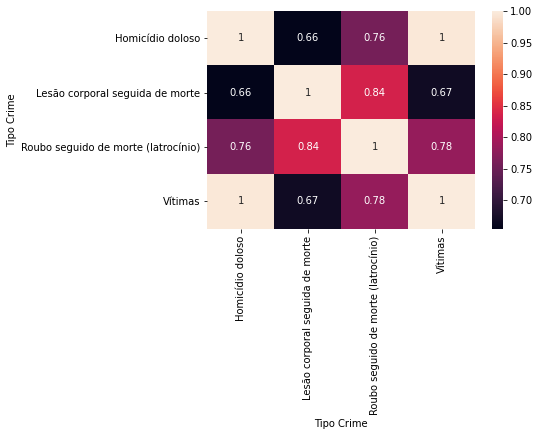

In [ ]:
df_crimes_corr = df_crimes[['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas']].corr()
sns.heatmap(df_crimes_corr, xticklabels=['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas'], yticklabels=['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas'], annot=True)

**O que podemos concluir?**

Dos crimes com vítimas, o tipo de crime que está mais correlacionado com o número de vítimas é (como era de se esperar) o Homicídio Doloso. Lesão corporal seguida de morte e Roubo seguido de morte (latrocínio) ficam logo atrás.

Além disso podemos ver que existe uma correlação forte entre Roubo seguido de morte e Lesão corporal seguido de morte.

In [ ]:
#Normalizando os dados 

x = df_crimes[['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_crimes_norm = pd.DataFrame(x_scaled, index=df_crimes.index, columns=['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas'])
df_crimes_norm.head()

,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),Vítimas
0,0.018959,0.000000,0.045455,0.016854
1,0.189219,0.049587,0.102273,0.195131
2,0.010037,0.115702,0.039773,0.010861
3,0.136245,0.148760,0.238636,0.147940
4,1.000000,0.743802,0.630682,1.000000


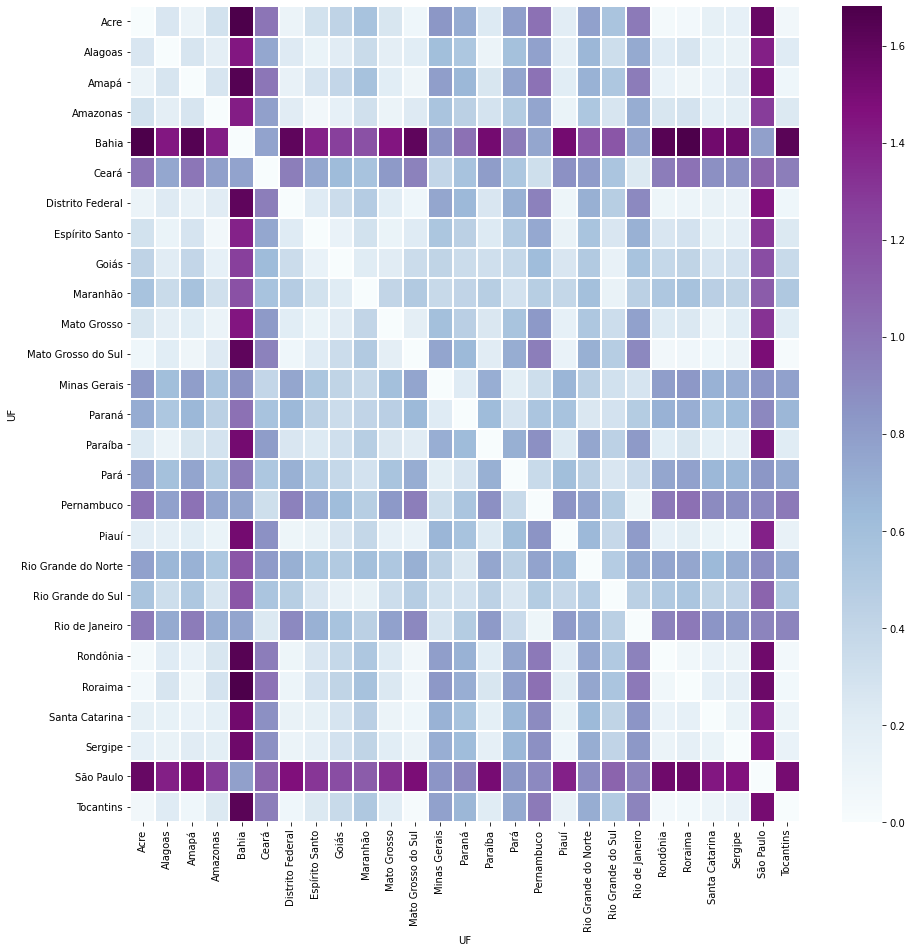

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dataframe_dist,
    cmap='BuPu',
    linewidth=1
)

Visualizando cidades similares a partir dos dados dos crimes

In [ ]:
long_form = dataframe_dist.unstack()

long_form.index.rename(["Cidade A", "Cidade B"], inplace=True)
long_form = long_form.to_frame('distance').reset_index()

In [ ]:
long_form[
    (long_form['distance'] < 0.1) 
    & (long_form['Cidade A'] != long_form['Cidade B'])
]

,Cidade A,Cidade B,distance
11,Acre,Mato Grosso do Sul,0.082629
21,Acre,Rondônia,0.045506
22,Acre,Roraima,0.047464
26,Acre,Tocantins,0.064772
65,Amapá,Mato Grosso do Sul,0.091355
76,Amapá,Roraima,0.088634
80,Amapá,Tocantins,0.084812
88,Amazonas,Espírito Santo,0.065515
173,Distrito Federal,Mato Grosso do Sul,0.079470
179,Distrito Federal,Piauí,0.094314


Analisando os dados de algumas dessas cidades podemos ver a semelheança a partir do nível de criminalidade, como exemplificado abaixo:

Valores retirados da base de dados

`Acre	271	1	11	285`

`Rondônia	381	1	15`	

`Pernambuco	3355	28	101	3686`

`Rio de Janeiro	3312	31	85	3649`

Com esses valores podemos perceber a semelheança entre Acre e Rondônia com niveis baixos de criminalidade se comparado a Rio de Janeiro e Pernambuco que são semelheantes entre si.

##Algoritmos de Clusterização

### K-Means

In [ ]:
from sklearn import metrics

for k in range(2, 10):

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_crimes_norm[['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas']])
  score_mean = metrics.silhouette_score(df_crimes_norm[['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas']], kmeans.labels_, metric='euclidean')
  print(k, score_mean)



2 0.5581280227410746
3 0.5487621510114795
4 0.4813229808584017
5 0.5015846606677051
6 0.40989361954037745
7 0.3956784185920038
8 0.32986502644855814
9 0.3420215562724581


Melhor silhouette é com k = 2

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_crimes[['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters = kmeans.labels_.tolist()
clusters_dict = { 'UF': list(df_crimes.UF), 'cluster': clusters}
dataframe_clusters = pd.DataFrame(clusters_dict, columns = ['cluster','UF'])

In [ ]:
dataframe_clusters

,cluster,UF
0,0,Acre
1,0,Alagoas
2,0,Amapá
3,0,Amazonas
4,1,Bahia
5,1,Ceará
6,0,Distrito Federal
7,0,Espírito Santo
8,0,Goiás
9,0,Maranhão


Analizando as classes formadas e a similaridade vista anteriormente pode-se ver que Acre e Rondônia ficaram no mesmo grupo, assim como Pernambuco e Rio de Janeiro. Dess maneira pode-se concluir que o Cluster 0 são os estados com níveis mais baixos de criminalidade e o 1 os níveis mais altos.

### Cluster Hierárquico 



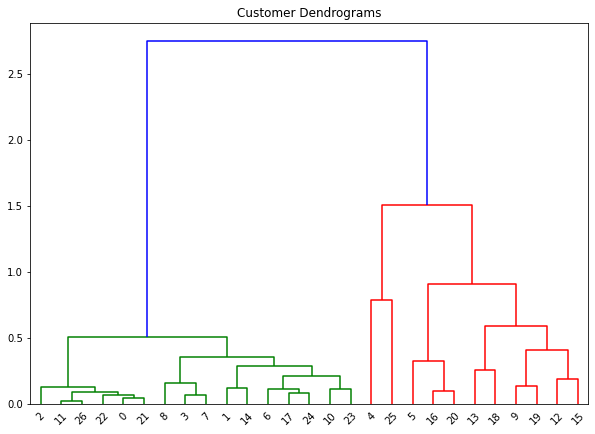

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df_crimes_norm, method='ward'))

Analisando o dedograma, pode-se concluir que o melhor número de cluster é 2.

In [ ]:
agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
agg_cluster.fit(df_crimes_norm[['Homicídio doloso','Lesão corporal seguida de morte','Roubo seguido de morte (latrocínio)', 'Vítimas']])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
clusters_h = agg_cluster.labels_.tolist()
clusters_dict_h = { 'UF': list(df_crimes.UF), 'cluster': clusters_h}
dataframe_clusters_h = pd.DataFrame(clusters_dict_h, columns = ['cluster','UF'])


In [ ]:
dataframe_clusters_h

,cluster,UF
0,1,Acre
1,1,Alagoas
2,1,Amapá
3,1,Amazonas
4,0,Bahia
5,0,Ceará
6,1,Distrito Federal
7,1,Espírito Santo
8,1,Goiás
9,0,Maranhão


Já nesse resultado apenas o valor dos cluters que foram trocados, o 0 são os estados com níveis mais altos de criminalidade e 1 os mais baixos.

In [ ]:
metrics.silhouette_score(df_crimes_norm, agg_cluster.labels_, metric='euclidean')

0.540018372610135

In [ ]:
metrics.silhouette_score(df_crimes_norm, kmeans.labels_, metric='euclidean')

0.5475818492368419

Calculando o silhouette dos dois algoritmos pode-se concluir que o algoritmo K-means tem o melhor score.

In [ ]:
#Salvando base clusterizada em arquivo csv
dataframe_clusters.to_csv('crimes_clusters.csv')